# Wine Quality Classification 

In this exercise, your task will be to predict the quality of different wines! Can winemakers predict whether their wine will be considered a good quality wine by the jury based on itís chemical properties only? 🍷 

**1. Data reading, preprocessing, understanding** <br><br> 
 We will work using the data available at the [UCI dataset](https://archive.ics.uci.edu/ml/datasets/Wine+Quality). It  contains data on 11 chemical properties (e.g. sugar content, pH, alcohol content, etc.) of thousands of north-Portugalian wines. Each wine has a quality score on a scale of 10. 

* Import the **Red** wine data into a pandas dataframe from the [dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv). (You should import the data directly from the web page, without downloading it to your computer!) The *quality* column will be the target variable, the rest will be the features. 
* This will be a binary classification problem, hence, redefine the target variable in the following way: let it be 0 if the *quality < 7* (bad wines) and let it be 1 if *quality $\geq$ 7* (good wines). 

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>fixed acidity</th>
      <th>volatile acidity</th>
      <th>citric acid</th>
      <th>residual sugar</th>
      <th>chlorides</th>
      <th>free sulfur dioxide</th>
      <th>total sulfur dioxide</th>
      <th>density</th>
      <th>pH</th>
      <th>sulphates</th>
      <th>alcohol</th>
      <th>quality</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>7.4</td>
      <td>0.70</td>
      <td>0.00</td>
      <td>1.9</td>
      <td>0.076</td>
      <td>11.0</td>
      <td>34.0</td>
      <td>0.9978</td>
      <td>3.51</td>
      <td>0.56</td>
      <td>9.4</td>
      <td>0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>7.8</td>
      <td>0.88</td>
      <td>0.00</td>
      <td>2.6</td>
      <td>0.098</td>
      <td>25.0</td>
      <td>67.0</td>
      <td>0.9968</td>
      <td>3.20</td>
      <td>0.68</td>
      <td>9.8</td>
      <td>0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>7.8</td>
      <td>0.76</td>
      <td>0.04</td>
      <td>2.3</td>
      <td>0.092</td>
      <td>15.0</td>
      <td>54.0</td>
      <td>0.9970</td>
      <td>3.26</td>
      <td>0.65</td>
      <td>9.8</td>
      <td>0</td>
    </tr>
  </tbody>
</table>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# wine-like colors-palette. :)
sns.color_palette("rocket_r", as_cmap=True)


DF_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
RANDOM_SEED = 2025

In [2]:
df = pd.read_csv(DF_URL, sep=";")


In [3]:
df["target"] = np.where(df["quality"] < 7, 0, 1)

y = df["target"]
X = df.drop(["quality", "target"], axis=1)

 * Perform some exploratory data analysis! For example create some visualizations about the dataset, e.g. scatterplots, correlation heatmaps, histograms etc...

In [4]:
dup_count = len(df[df.duplicated()])

print(f"Number of duplicates in the data: {dup_count}")

Number of duplicates in the data: 240


In [5]:
df = df.drop_duplicates()

y = df["target"]
X = df.drop(["quality", "target"], axis=1)

In [6]:
df["target"].value_counts()

0    1175
1     184
Name: target, dtype: int64

In [7]:
df.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             7.4              0.70         0.00             1.9      0.076   
1             7.8              0.88         0.00             2.6      0.098   
2             7.8              0.76         0.04             2.3      0.092   
3            11.2              0.28         0.56             1.9      0.075   
5             7.4              0.66         0.00             1.8      0.075   
6             7.9              0.60         0.06             1.6      0.069   
7             7.3              0.65         0.00             1.2      0.065   
8             7.8              0.58         0.02             2.0      0.073   
9             7.5              0.50         0.36             6.1      0.071   
10            6.7              0.58         0.08             1.8      0.097   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                  11.0                  34.0   0.9978  3.51       0.56   
1                  25.0                  67.0   0.9968  3.20       0.68   
2                  15.0                  54.0   0.9970  3.26       0.65   
3                  17.0                  60.0   0.9980  3.16       0.58   
5                  13.0                  40.0   0.9978  3.51       0.56   
6                  15.0                  59.0   0.9964  3.30       0.46   
7                  15.0                  21.0   0.9946  3.39       0.47   
8                   9.0                  18.0   0.9968  3.36       0.57   
9                  17.0                 102.0   0.9978  3.35       0.80   
10                 15.0                  65.0   0.9959  3.28       0.54   

    alcohol  quality  target  
0       9.4        5       0  
1       9.8        5       0  
2       9.8        5       0  
3       9.8        6       0  
5       9.4        5       0  
6       9.4        5       0  
7      10.0        7       1  
8       9.5        7       1  
9      10.5        5       0  
10      9.2        5       0

In [8]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1359.000000       1359.000000  1359.000000     1359.000000   
mean        8.310596          0.529478     0.272333        2.523400   
std         1.736990          0.183031     0.195537        1.352314   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.430000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1359.000000          1359.000000           1359.000000  1359.000000   
mean      0.088124            15.893304             46.825975     0.996709   
std       0.049377            10.447270             33.408946     0.001869   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996700   
75%       0.091000            21.000000             63.000000     0.997820   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality       target  
count  1359.000000  1359.000000  1359.000000  1359.000000  1359.000000  
mean      3.309787     0.658705    10.432315     5.623252     0.135394  
std       0.155036     0.170667     1.082065     0.823578     0.342270  
min       2.740000     0.330000     8.400000     3.000000     0.000000  
25%       3.210000     0.550000     9.500000     5.000000     0.000000  
50%       3.310000     0.620000    10.200000     6.000000     0.000000  
75%       3.400000     0.730000    11.100000     6.000000     0.000000  
max       4.010000     2.000000    14.900000     8.000000     1.000000

In [9]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
target                    int64
dtype: object

<AxesSubplot:title={'center':'Distribution of Wine Quality'}, xlabel='quality', ylabel='count'>

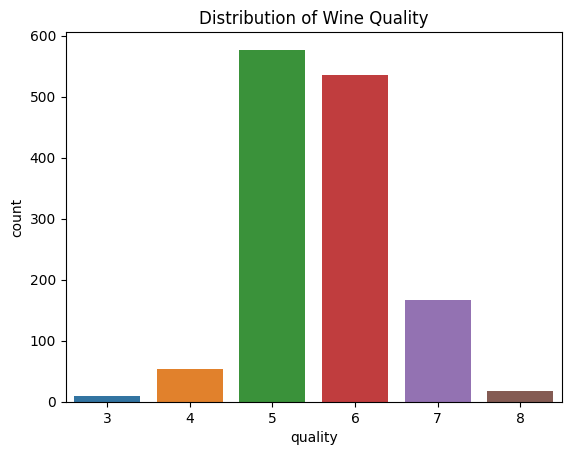

In [10]:
quality_distribution = pd.DataFrame(df["quality"].value_counts()).reset_index()

quality_distribution.columns = ["quality","count"]

plt.title("Distribution of Wine Quality")
sns.barplot(quality_distribution, y="count", x="quality")

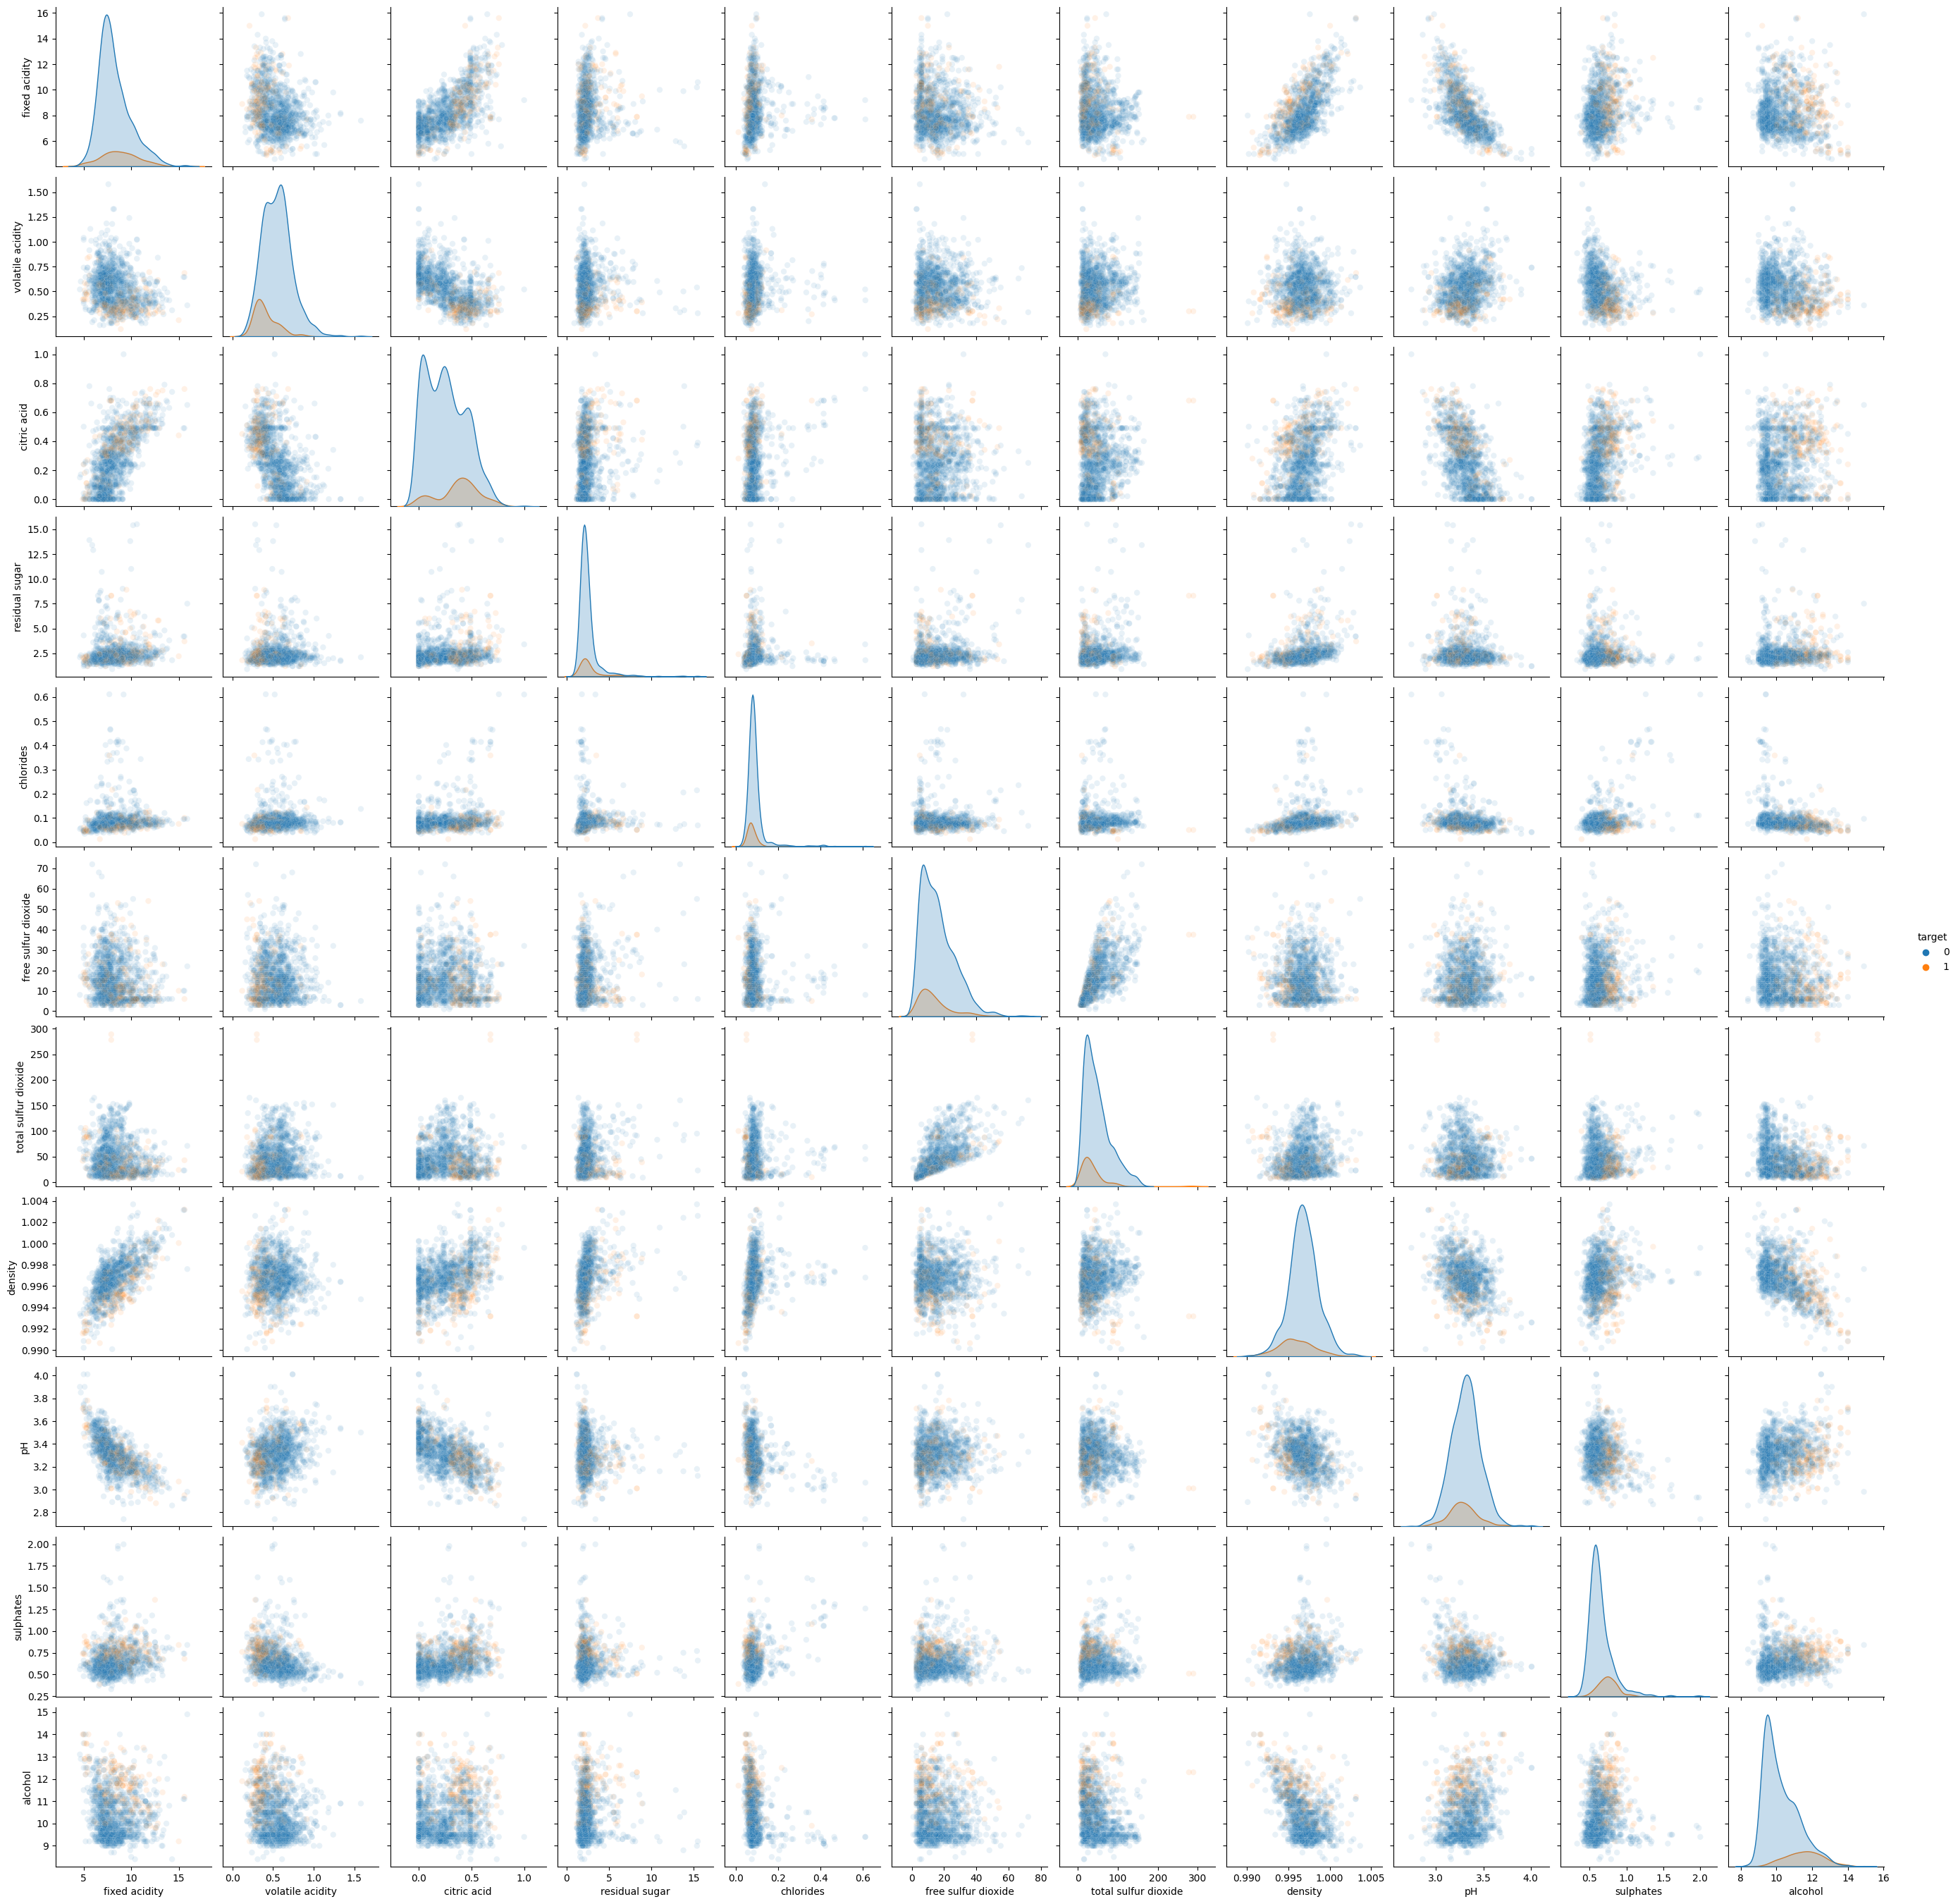

In [11]:
# This will take a minute

dims = X.columns

sns.pairplot(df, hue="target", plot_kws={'alpha': 0.1}, x_vars=dims, y_vars=dims)
plt.show()

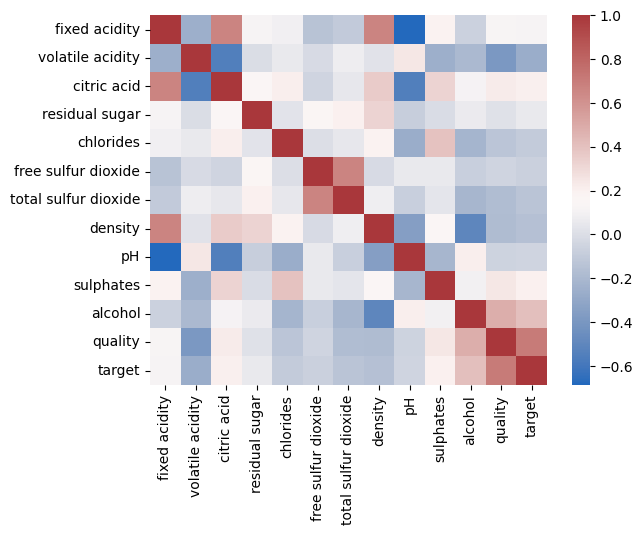

In [12]:
corr = np.corrcoef(df.T)
labels = df.columns

sns.heatmap(corr, fmt='g', xticklabels=labels, yticklabels=labels, cmap="vlag")
plt.show()

## Observations


- There are **no missing entries**, which is great!
- All columns contain **coninuous variables**.
- Only 13.57% of the wines are labeled "good". -- A **class inbalance** is present.
- The variables are on different scale. This would affect many models (e.g.: linear models and kNN), unless we rescale.
- The **size of the dataset is moderate**. 1359 data points and 11 dimensions. -- 1 or 2 hidden layer neural net could work, but this not a deep learning problem. We can use most models and basic statistical methods against it.
- The data is **not liearly separable**. 
- The denistities of the good wines are heavily covered by densities of bad ones. So being precise in predicting if a wine is good, may be tough! 
- Densities are visibly different between classes for: "volatile acidity", "sulphates", "alcohol". The other dimensions seem noisy. Noisy parameters affect distance-based methods.
- Densities are **skewed** in most cases. This can affect distance based and linear models. 
- The **dimensions are correlated**. This can disturb some models, e.g. linear models, kNN or naive Bayes. We might want to introduce a PCA layer as preprocessing step in such cases.
- There are **240 duplicate** entries (~15% of the data). 


## Duplicates

This may or may not be a natrual pheonomenon but it can cause data leakage. If it is a natrual phenomenon, then our train-test split's test set (with its data leakage) would mimic out-of-sample data. 

We have to decide either to keep the duplicates or remove them from our model. The main deciding factor should be out-of-sample performace. If we can assume that duplicates also pop up out of sample, then keeping them helps us. But we want to predict the goodness of new wines, so let's not keep them.

**I dropped the duplicates!** 

**2. Classification I: DecisionTree and kNN**  <br>

In this second exercise, you should train and evaluate different models from the sklearn library.

First of all, randomly seperate the data into 2 different subsets: 70% of the data should be used for training, 30% of the data should be used for testing. Don't forget to set the random_state parameter to make your results reproducible. 

Import the kNN and decision tree algorithms from the sklearn library, and evaluate their performance based on 4 different metrics: Accuracy, Precision, Recall, and F1 score.

Interpret the results and write a few sentences about your thoughts!

In [13]:
from sklearn.model_selection import train_test_split

# I've stratified the sampling so that we don't run into any issues because of the class imbalance.
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, train_size=.7, random_state=RANDOM_SEED)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


def train_and_score_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1, zero_division=0)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    return {
        "Accuracy": round(accuracy,5),
        "Precision": round(precision, 5),
        "Recall": round(recall, 5),
        "F1": round(f1, 5),
    }

result = pd.DataFrame()
    
knn = KNeighborsClassifier()
result["kNN"] = train_and_score_model(knn)

decision_tree = DecisionTreeClassifier(random_state=RANDOM_SEED)
result["Decision Tree"] = train_and_score_model(decision_tree)

always_0 = DummyClassifier(strategy="constant", constant=0)
result["Always bad"] = train_and_score_model(always_0)

always_1 = DummyClassifier(strategy="constant", constant=1)
result["Always good"] = train_and_score_model(always_1)

result

kNN  Decision Tree  Always bad  Always good
Accuracy   0.84804        0.81618      0.8652      0.13480
Precision  0.33333        0.36486      0.0000      0.13480
Recall     0.12727        0.49091      0.0000      1.00000
F1         0.18421        0.41860      0.0000      0.23758

I've also trained two dummy classifier in order to view these metrics in a better context. One of the dummies predicts always 0 (bad wine) the other one predicts always 1 (good wine).

## Issues with accuracy
As I mentioned above, the **data is imbalanced**. Only 13.57% of the data points make up one class (good wines), while 86.43% makes up the rest (bad wines). Because of this, the always-bad classifier produces good accuracy, better than our kNN and decision tree models. 

Accuracy is usually not a good metric when it comes to imbalanced classification. 

## Other metrics

We want to filter out the good wines with our models. The other metrics are relevant to our cause.
- **precision** -- what percent of wines recommended by the model are actually good.
- **recall** -- what percent of the actually good wines are recommended by the model.
- **F1** -- the harmonic mean of precision and recall. It is a better metric for imbalanced classification than accuracy is.

We have seen that recall can be maximised by a dummy. 
Precision can be similarly closely maximised.
The maximalization of recall and precision by such methods happens on the expense of ruining the other metric. 
It also results in a bad F1 score.
So the task of maximizing precision or recall is trivial and F1 is actually challanging to improve.

**F1 seems the most resonable to use.**

Compared to the always-good dummy:
- F1 improves on decision tree from 23.6% to 41.9%!

I am positive that via either fine-tuning or inpcorporating other methods our predictions can be improved!

**3. Classification II: Cross-validation** <br>

Now you should further optimize the models used in the previous exercise. 

Using the 10-fold cross-validation technique determine for what value of *k* optimizes the classifier's F1 score! In other words, for which value *k* does the classifier achieve the highest performance (F1-score)? (Analyze values of *k* on a reasonable interval!)
Present a boxplot of the obtained F-scores (a boxplot of 10 F1-scores for each value of *k*) against *k*

Repeat the same process for the decision tree model to determine the optimal max depth parameter.

(Hints: Use the *model_selection.cross_val_score* function and set *scoring = 'f1'*! Use the boxplot function from the *seaborn* package!) <br>

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer

precision_scorer = make_scorer( precision_score, pos_label=1, zero_division=0)
recall_scorer = make_scorer(recall_score, pos_label=1)
f1_scorer = make_scorer(f1_score, pos_label=1)

In [17]:
def get_grid_search_scores(clf):
    """
    Returns mean training and test scores in a DF.
    Orders by test score.
    """
    return pd.DataFrame(clf.cv_results_).loc[:,["rank_test_f1", "mean_train_f1", "mean_test_f1"]].sort_values("rank_test_f1")

In [18]:
def boxplot_metrics(cv_results_df, col_value, col_name):
    
    fig, axes = plt.subplots(3, 1, figsize=(8, 15), sharex=True)

    # --- F1 ---
    data_f1 = cv_results_df.filter(regex="split.*_test_f1").T
    data_f1.columns = col_value
    sns.boxplot(data=data_f1, ax=axes[0])
    axes[0].set(ylabel='F1', title="10-fold validation F1 scores")

    # --- Precision ---
    data_precision = cv_results_df.filter(regex="split.*_test_precision").T
    data_precision.columns = col_value
    sns.boxplot(data=data_precision, ax=axes[1])
    axes[1].set(ylabel='Precision', title="10-fold validation Precision scores")

    # --- Recall ---
    data_recall = cv_results_df.filter(regex="split.*_test_recall").T
    data_recall.columns = col_value
    sns.boxplot(data=data_recall, ax=axes[2])
    axes[2].set(xlabel=col_name, ylabel='Recall', title="10-fold validation Recall scores")

    plt.tight_layout()
    plt.show()

0.36641010081040065


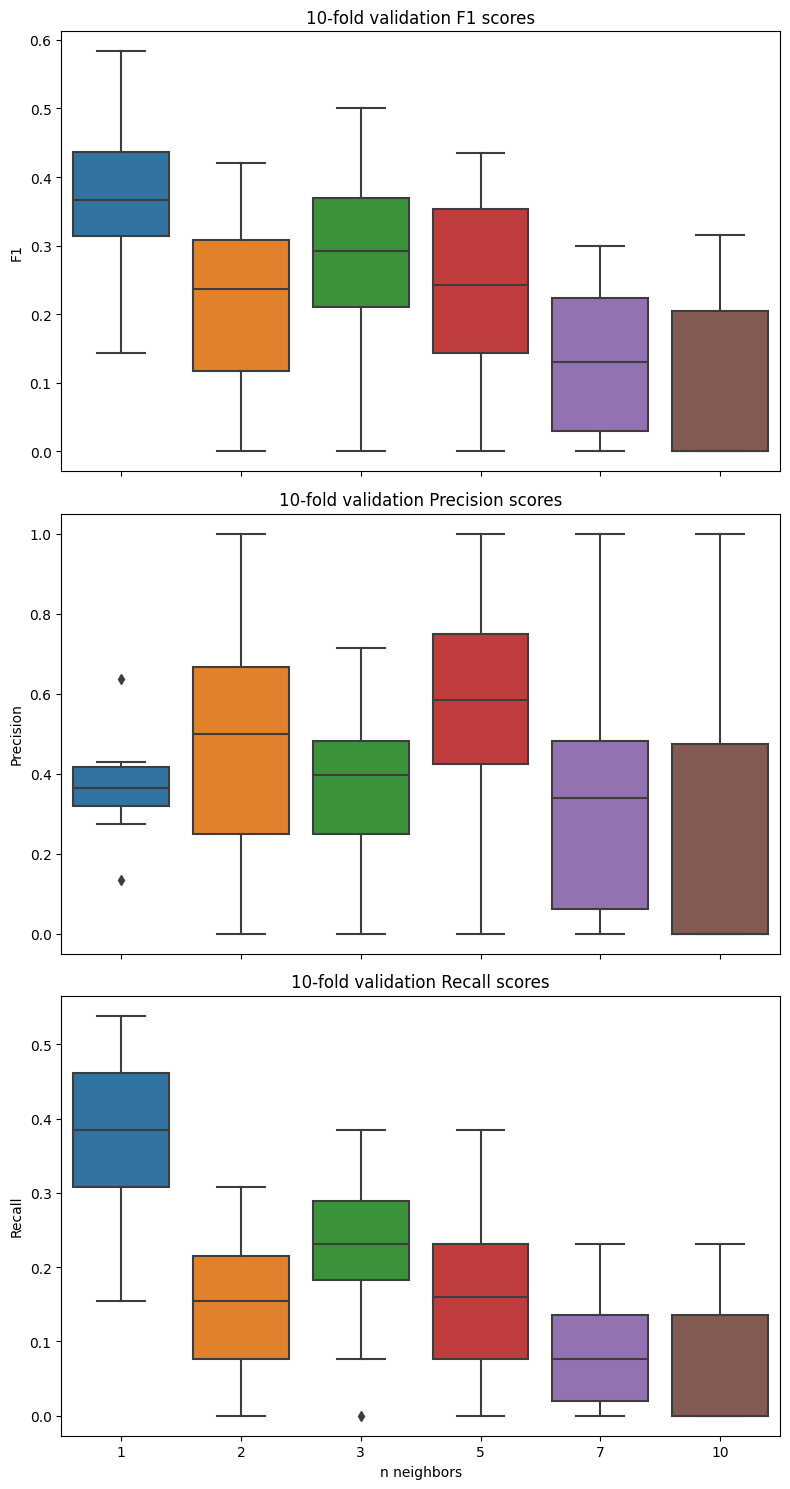

In [19]:
parameters = {
    "n_neighbors": [1,2,3,5,7,10]
}

# According to the docs, GridSearchCV uses stratified cv with classifiers.
# It also does not shuffle the data.

clf = GridSearchCV(
    KNeighborsClassifier(), 
    parameters, 
    scoring={"f1":f1_scorer, "precision": precision_scorer, "recall": recall_scorer}, 
    refit="f1",
    cv=10, 
    return_train_score=True)

clf.fit(X_train, y_train)

print(clf.best_score_)

boxplot_metrics(pd.DataFrame(clf.cv_results_), parameters["n_neighbors"], "n neighbors")

In [20]:
get_grid_search_scores(clf)

rank_test_f1  mean_train_f1  mean_test_f1
0             1       1.000000      0.366410
2             2       0.637593      0.277431
3             3       0.422857      0.240374
1             4       0.551079      0.209216
4             5       0.315319      0.137101
5             6       0.136571      0.095852

0.41605529168189015


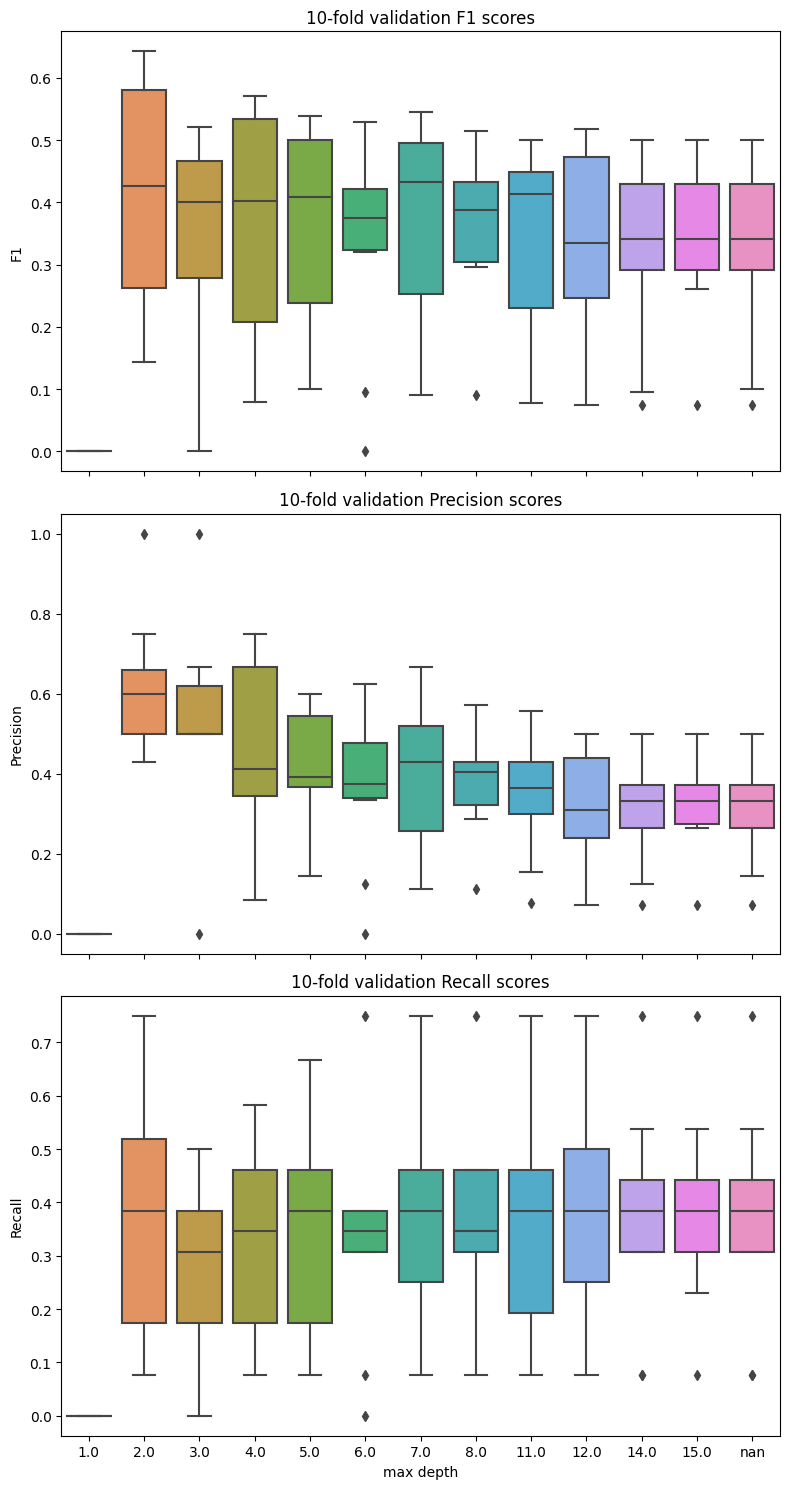

In [21]:
parameters = {
    "max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 11, 12, 14, 15, None]
}

clf = GridSearchCV(
    DecisionTreeClassifier(random_state=RANDOM_SEED), 
    parameters, 
    scoring={"f1":f1_scorer, "precision": precision_scorer, "recall": recall_scorer}, 
    refit="f1",
    cv=10, 
    return_train_score=True
)

clf.fit(X_train, y_train)

print(clf.best_score_)

boxplot_metrics(pd.DataFrame(clf.cv_results_), parameters["max_depth"], "max depth")

In [22]:
get_grid_search_scores(clf)

rank_test_f1  mean_train_f1  mean_test_f1
1              1       0.485176      0.416055
6              2       0.869895      0.369195
4              3       0.714067      0.367680
3              4       0.584353      0.366651
7              5       0.917941      0.364094
8              6       0.981948      0.345143
2              7       0.485110      0.345051
11             8       0.999567      0.344628
5              9       0.795360      0.332489
9             10       0.990601      0.330581
12            11       1.000000      0.328541
10            12       0.998261      0.328065
0             13       0.000000      0.000000

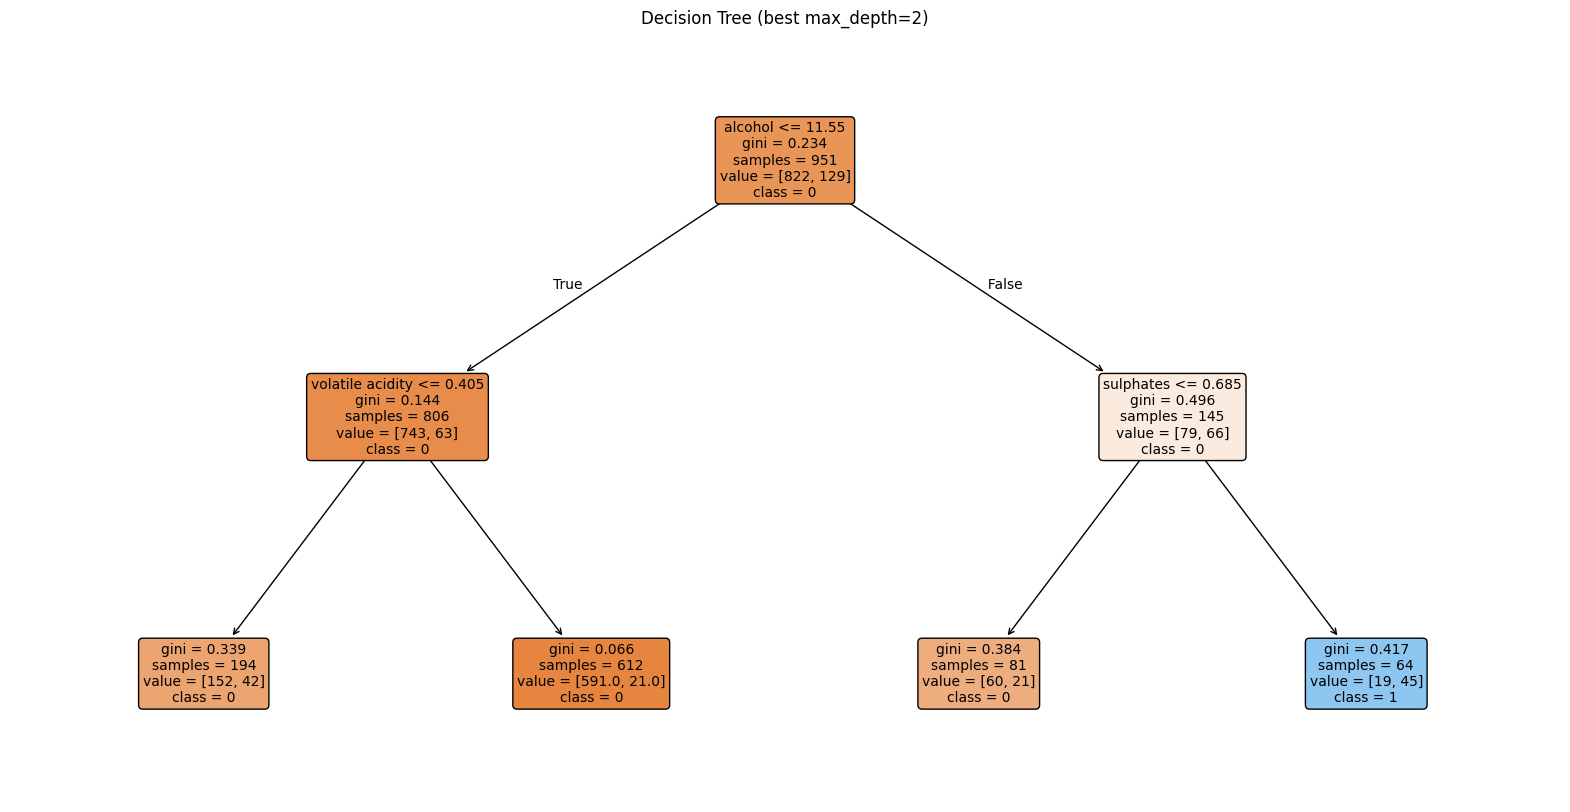

In [23]:
best_tree = clf.best_estimator_
plt.figure(figsize=(20, 10))
plot_tree(
    best_tree, 
    filled=True, 
    feature_names=X_train.columns, 
    class_names=[str(c) for c in clf.classes_], 
    rounded=True, 
    fontsize=10
)
plt.title(f"Decision Tree (best max_depth={best_tree.get_params()['max_depth']})")
plt.show()

## kNN
kNN reached the best result (F1=36.64%) with `k=1`. 
This is the most **most overfitting** value for k!
We can also see this from the the chart about training and test scores.

We also experience a huge drop in recall after `k=1`.
With `k=1`, we are better at finding good wines. 
`k=2` makes things hard, becaues there are more of the bad wines, and according to knn's implementation, upon equal number of votes, the smaller value is chosen, so we predict bad wine (0=bad, 1=good). 

`k=1`'s precision box seems to be tight, it means that regardless of test set selection, from a good wine (whatever we want to categorize) we have 35-40% chance that the closest wine is also good (1-nearest-neighbor). 
This is intersting, because only ~14% of wines are good. 

Recall seems to steadily decrease. With a bigger `k` value it is likely to have a more neighbors!

In higher dimensions the noisy dimensions make predictions less accurate.

## Decision Tree
Decision tree reached the best result (F1=41.61%) with `max_depth=2`. 
This is the **least overfitting value**!

We get the first decision rule label wines good at the 3rd layer of the tree!
This rule (with its parents) is 60% right (precision) and finds 40% of all good wines (recall)!

Recall stagnates and precision drops. It means that the new rules tend to find false positives. 

After `max_depth=2`, the model starts to overfit!

It seems we have lost performace compared to the non-crossvalidated version (F1=41,86%) in ex 3.
This should happen due to the different amount of traning data, with CV we lose 10% of the data. 

## Comparison

Decision tree did better than kNN, some reasons for it:
- Distance-based methods rely on scaled and uncorrelated dimensions. 
- They also require the lack of noisy dimensions. This is why kNN is sensitive to superfluous dimensions in the dataset. 



**4. Classification III: Present your own ideas** <br>
In the fourth exercise, you should present your own ideas about this problem. 
For example, you could try different models from the sklearn library (or from other packages) or try different scaling techniques or feature selection methods, etc... It is all up to you! Try to produce a model which performs better than the optimized kNN and decision tree models.

**I implement these ideas:**
- finetuning kNN -- distance-based models have issues with un-preprocessed data, let's preprocess the data.
- finetuning decision tree -- it can natively make up for the class imbalance
- for kNN we can make for the class imbalance with sampling methods.
- try other, more complex models: SVM, ensamble methods
   

**I have some other ideas too that I did not investigate:**
- reframing the problem as multi-class classification or regression with the inital class labels
- reframing the problem as anomaly detection
- use a smaller neural net, it would allow for more complex decision boundaries than decision trees and would require similar preprocessing as kNN.
- playing with the roc-auc curve to optimise a model

## Finetuning kNN 
I think we can still squeeze some performance out of decision trees and knn fo the current problem.

For kNN-s we should preprocess the data to make it unskewed, uncorrelated and same-scaled. 
We should also use sampling methods, to make up for the class imbalance.

In [24]:
%pip install imbalanced-learn==0.14.0
from sklearn.preprocessing import MinMaxScaler, PowerTransformer, StandardScaler
from sklearn.decomposition import PCA
from imblearn.pipeline import Pipeline


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


0.38664172249580786 {'knn__n_neighbors': 10}


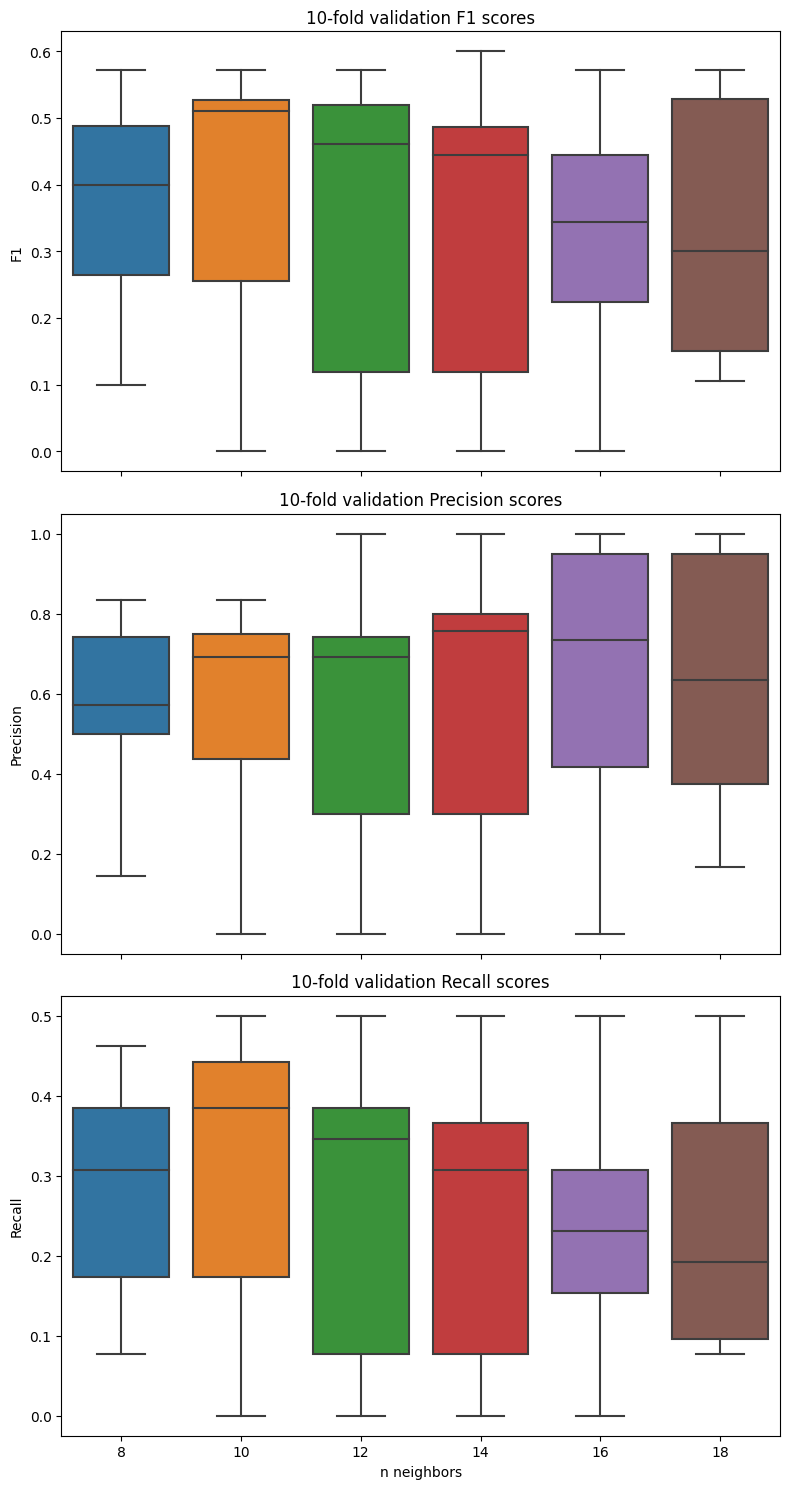

In [25]:
# Let's do better than 36.64% with kNN!
# distance -> k=2 looks better

parameters = {
    "knn__n_neighbors": [8, 10, 12, 14, 16, 18],
    # "knn__weights":["distance"] # Overfits model
}

model = Pipeline([
    ("unskew", PowerTransformer()),
    ("pca", PCA()),
    ("scaler", MinMaxScaler()),
    ("knn", KNeighborsClassifier())
])

clf = GridSearchCV(
    model,
    parameters, 
    scoring={"f1":f1_scorer, "precision": precision_scorer, "recall": recall_scorer}, 
    refit="f1",
    cv=10, 
    return_train_score=True)

clf.fit(X_train, y_train)

print(clf.best_score_, clf.best_params_)

boxplot_metrics(pd.DataFrame(clf.cv_results_), parameters["knn__n_neighbors"], "n neighbors")

The best median F1 score is ~55%, while the best average is only 38.66%. We can see that the min score in the cv batch is 0. So is the min recall score. It should happen due to the class imabalance and noisy dimensions. Let's fix those!

Now we are going to find more than 1 hyper parameters.
Let's try visualising it in a grid.

In [26]:
# IMPORTANT: No data leakage is caused by oversampling in the pipeline!
# The RandomOverSampler is NOT applied in transform mode (it only has a fit_resample, not a transform method).
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


from sklearn.feature_selection import SelectKBest, mutual_info_classif

# To set mutual_info_classif's random state
from functools import partial
mutual_info_classif = partial(mutual_info_classif, random_state=RANDOM_SEED)

In [27]:
def gridplot_metrics(cv_results_df, dim1, dim2):
    """
    Plot a grid of F1, precision and recall along 2 hyperparameters!
    """
    fig, axes = plt.subplots(3, 1, figsize=(8, 15))
    

    param_dim_1 = "param_" + dim1
    param_dim_2 = "param_" + dim2

    # --- F1 ---
    data_f1_pivot_table = cv_results_df.pivot(index=param_dim_1, columns=param_dim_2, values="mean_test_f1")
    sns.heatmap(data_f1_pivot_table, annot=True, fmt=".3f",  ax=axes[0])
    axes[0].set(title="F1 scores", xlabel=dim2, ylabel=dim1)
    # --- Precision ---
    data_precision_pivot_table = cv_results_df.pivot(index=param_dim_1, columns=param_dim_2, values="mean_test_precision")
    sns.heatmap(data_precision_pivot_table, annot=True, fmt=".3f",  ax=axes[1])
    axes[1].set(title="Precision", xlabel=dim2, ylabel=dim1)
    # --- Recall ---
    data_recall_pivot_table = cv_results_df.pivot(index=param_dim_1, columns=param_dim_2, values="mean_test_recall")
    sns.heatmap(data_recall_pivot_table, annot=True, fmt=".3f",  ax=axes[2])
    axes[2].set(title="Recall", xlabel=dim2, ylabel=dim1)

    plt.tight_layout()
    plt.show()

In [28]:
# We select the 3 columns which had visible different densities between classes!
column_selector = ColumnTransformer(
    transformers=[
        ('select_best_3', StandardScaler(), ["volatile acidity", "sulphates", "alcohol"]),
    ]
)

0.5650633339121202


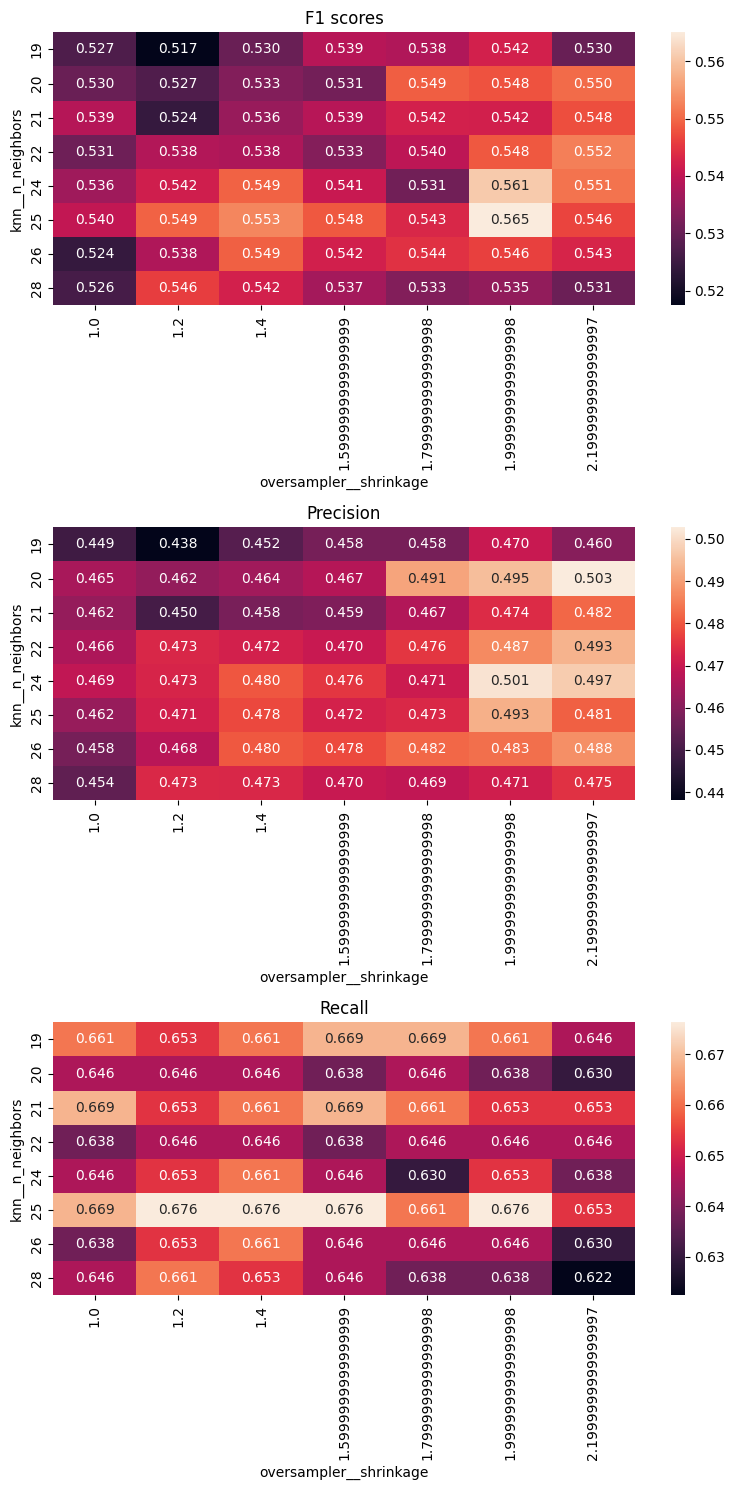

In [29]:
# This will take a minute

parameters = {
    "knn__n_neighbors": [19,20,21,22,24,25,26,28],
    "knn__weights": ["uniform"],
    "oversampler__shrinkage": np.arange(1, 2.2 , .2),
    "oversampler__sampling_strategy": [0.4],
}

model = Pipeline([
    ("column_selector", column_selector),
    ("unskew", PowerTransformer()),
    ("pca", PCA()),
    ("undersampler", TomekLinks()),
    ("oversampler", RandomOverSampler(random_state=RANDOM_SEED)),
    ("knn", KNeighborsClassifier())
])

clf = GridSearchCV(
    model,
    parameters, 
    scoring={"f1":f1_scorer, "precision": precision_scorer, "recall": recall_scorer}, 
    refit="f1",
    cv=10, 
    return_train_score=True)

clf.fit(X_train, y_train)

print(clf.best_score_)

gridplot_metrics(pd.DataFrame(clf.cv_results_), "knn__n_neighbors", "oversampler__shrinkage")

In [30]:
get_grid_search_scores(clf).head(5)

rank_test_f1  mean_train_f1  mean_test_f1
40             1       0.571323      0.565063
33             2       0.576436      0.560932
37             3       0.574009      0.553122
27             4       0.579773      0.552259
34             5       0.577901      0.551004

We have impoved from F1=36.64% to F1=56.51! Precision seems to be lower while recall is higher. So our model estimates wines to be be good too often.

We introduced over and undersampling and oversampling in order to make up for the class imbalance. 
We also introduced dimensionality reduction to make up for the noisy dimensions.

Our model seems to fit on the test set almost as well as on the training set. 

In [31]:
clf.best_params_

{'knn__n_neighbors': 25,
 'knn__weights': 'uniform',
 'oversampler__sampling_strategy': 0.4,
 'oversampler__shrinkage': 1.9999999999999998}

## Decision tree finetuned
Let's try also fine-tuning the tree model!

Decision trees can natively make up for class-imbalance with the `class_weight` parameter.
They also don't require data rescaling.

In [32]:
# This will take a couple of mintues

parameters = {
    "max_depth": [1, 2, 3, 4, 5, 6, 7],
    "class_weight": [{0:1, 1:2}, {0:1, 1:3}, {0:1, 1:4}, {0:1, 1:5}, {0:1, 1:6}],
    "criterion": ["gini", "entropy"]
}

clf = GridSearchCV(
    DecisionTreeClassifier(random_state=RANDOM_SEED), 
    parameters, 
    scoring={"f1":f1_scorer, "precision": precision_scorer, "recall": recall_scorer}, 
    refit="f1",
    cv=10, 
    return_train_score=True
)

clf.fit(X_train, y_train)

print(clf.best_score_)

0.5831261784072259


In [33]:
pd.DataFrame(clf.cv_results_).sort_values("mean_test_f1", ascending=False).loc[:,["params", "mean_test_f1", "mean_test_precision", "mean_test_recall"]].head(5)

params  mean_test_f1  \
45  {'class_weight': {0: 1, 1: 5}, 'criterion': 'g...      0.583126   
24  {'class_weight': {0: 1, 1: 3}, 'criterion': 'e...      0.579646   
10  {'class_weight': {0: 1, 1: 2}, 'criterion': 'e...      0.572447   
59  {'class_weight': {0: 1, 1: 6}, 'criterion': 'g...      0.553845   
38  {'class_weight': {0: 1, 1: 4}, 'criterion': 'e...      0.553129   

    mean_test_precision  mean_test_recall  
45             0.474415          0.776923  
24             0.484858          0.738462  
10             0.488249          0.707692  
59             0.436703          0.769231  
38             0.458529          0.715385

In [34]:
get_grid_search_scores(clf).head(5)

rank_test_f1  mean_train_f1  mean_test_f1
45             1       0.642488      0.583126
24             2       0.641501      0.579646
10             3       0.643163      0.572447
59             4       0.627973      0.553845
38             5       0.638698      0.553129

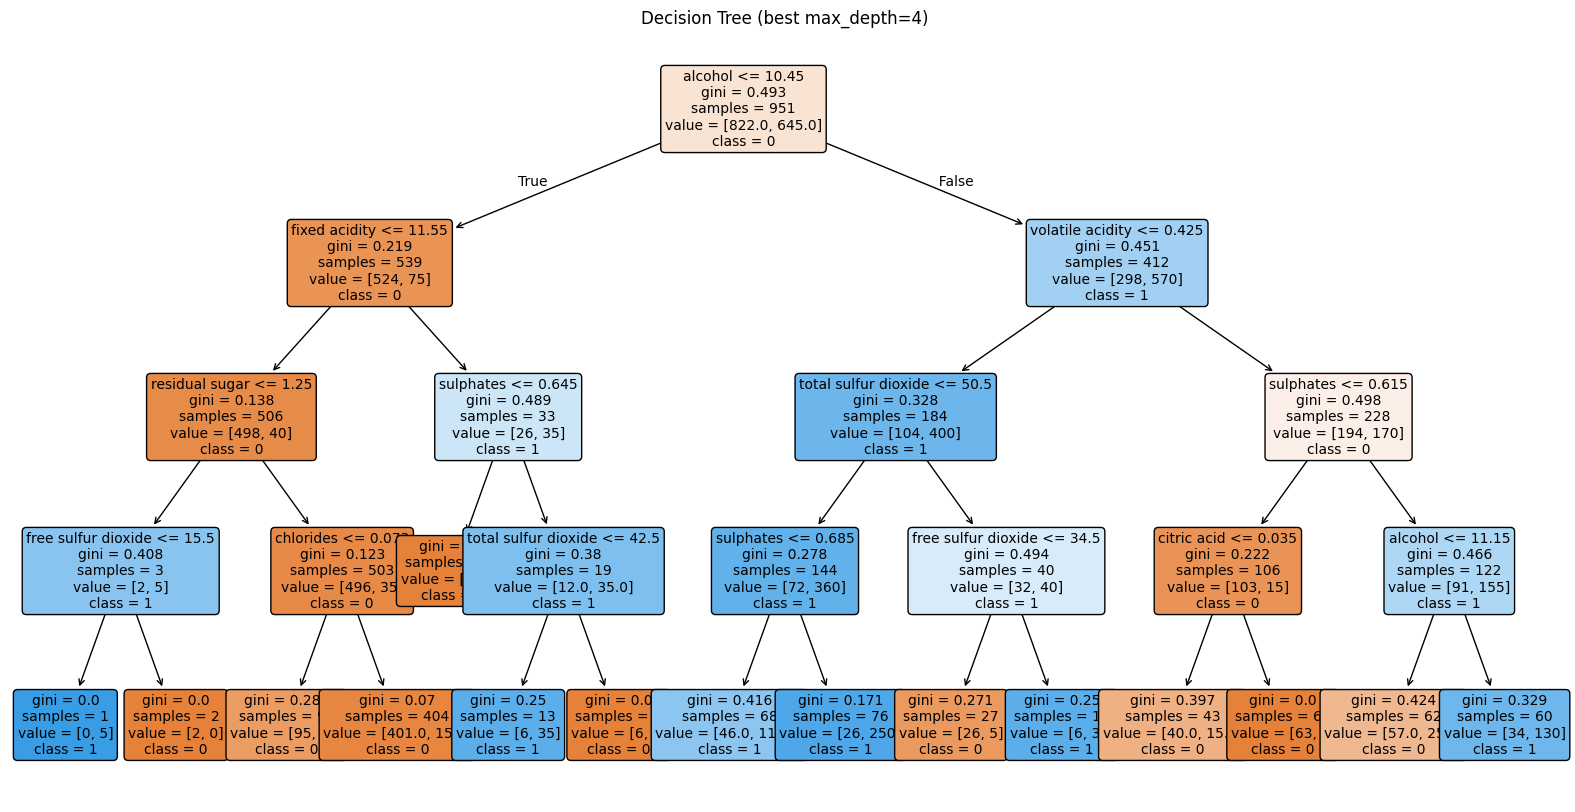

In [35]:
best_tree = clf.best_estimator_
plt.figure(figsize=(20, 10))
plot_tree(
    best_tree, 
    filled=True, 
    feature_names=X_train.columns, 
    class_names=[str(c) for c in clf.classes_], 
    rounded=True, 
    fontsize=10
)
plt.title(f"Decision Tree (best max_depth={best_tree.get_params()['max_depth']})")
plt.show()

We have managed to improve to **F1=58.31%** from F1=41.61% with decision trees.

I've tried other configurations, with entropy, max_leaf_nodes instead of max_depth. 

This model seems to **overfit more than our fine-tuned kNN model**!

## Let's try a SVM model! 

We will need to use the kernel-trick and an error term. 
We do this becuase the data is not separable and the decision boundary to be learnt is not linear.

In [36]:
from sklearn.svm import SVC

0.5396219004538191


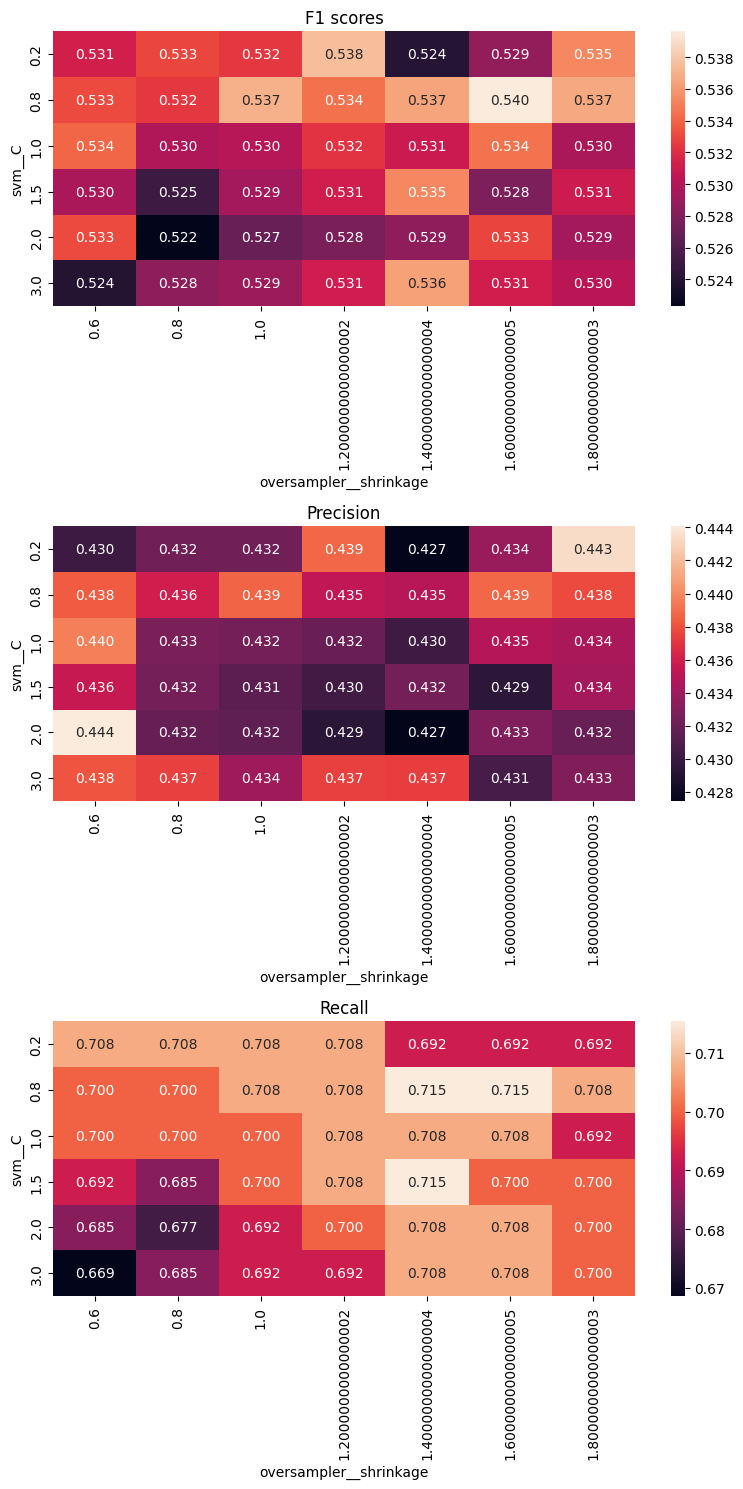

In [37]:
# This will also run for a couple of minutes!

parameters = {
    "svm__C": [0.2, 0.8, 1, 1.5, 2, 3],
    "svm__gamma": ["auto"],
    "oversampler__shrinkage": np.arange(0.6, 2 , .2),
    "oversampler__sampling_strategy": [0.5]
}

model = Pipeline([
    ("selector", SelectKBest(k=3, score_func=mutual_info_classif)),
    ("unskew", PowerTransformer()),
    ("pca", PCA()),
    ("undersampler", TomekLinks()),
    ("oversampler", RandomOverSampler(random_state=RANDOM_SEED)),
    ("svm", SVC())
])

clf = GridSearchCV(
    model,
    parameters, 
    scoring={"f1":f1_scorer, "precision": precision_scorer, "recall": recall_scorer}, 
    refit="f1",
    cv=10, 
    return_train_score=True)

clf.fit(X_train, y_train)

print(clf.best_score_)

gridplot_metrics(pd.DataFrame(clf.cv_results_), "svm__C", "oversampler__shrinkage")

In [38]:
get_grid_search_scores(clf).head(5)

rank_test_f1  mean_train_f1  mean_test_f1
31             1       0.569473      0.539622
18             2       0.560492      0.537559
13             3       0.570166      0.537040
37             4       0.569403      0.536688
25             5       0.568188      0.536502

We reached F1=53,96%. It seems to underperform both the decision tree and kNN.

We slightly overfit with this approach. 

## Ensamble methods

We are trying to do better, than F1=58.31% of the decision tree!

In order to do that, let's introduce gradient boosting and TPE!

In [39]:
%pip install xgboost hyperopt

import xgboost as xgb
import hyperopt as hp
import os
# hyperopt needs random seed set via HYPEROPT_FMIN_SEED.
os.environ["HYPEROPT_FMIN_SEED"] = str(RANDOM_SEED)    


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [40]:
from sklearn.model_selection import cross_val_score

def objective_factory(model):
    def objective(params):
        model.set_params(**params)
        
        f1_scores = cross_val_score(model, X_train, y_train, cv=10, scoring=f1_scorer)
        score = f1_scores.mean()
        #print(f"F1 score: {round(score, 5)}, with params: {params}")

        return 1 - score # We need to minimize
    return objective
    
def get_best_f1_score_from_trials(trials):
    return 1-min(trials.results, key=lambda x: x["loss"])["loss"]

def get_in_the_sample_error(model, params):
    model.set_params(**params)
    model.fit(X_train, y_train)
    
    return f1_scorer(model, X_train, y_train)
    

def tpe(model, param_space, n_rounds):
    objective_function = objective_factory(model)
    
    trials = hp.Trials()
    
    best = hp.fmin(
        fn=objective_function,
        space=param_space,
        algo=hp.tpe.suggest,
        max_evals=n_rounds, 
        trials=trials,
    )
    
    best_f1 = get_best_f1_score_from_trials(trials)
    in_sample_score = get_in_the_sample_error(model, best)
    print("="*20)
    print(f"BEST SCORE: {best_f1}")
    
    
    return {"best": best, "in_the_sample_best":in_sample_score, "out_of_sample_best": best_f1, "trials": trials}

In [41]:
import xgboost as xgb

param_space = {
    "xgb__max_depth": hp.hp.randint('xgb__max_depth', 2, 5),
    "xgb__learning_rate": hp.hp.choice('xgb__learning_rate', np.array([0.001, 0.005, 0.01, 0.05, 0.1])),
    'xgb__n_estimators': hp.hp.choice('xgb__n_estimators', [100, 200, 500]),
    
    #"xgb__scale_pos_weight": hp.hp.uniform('xgb__scale_pos_weight', 0.1, 10),  # for class imbalance
    
    #"xgb_gamma": hp.hp.uniform('xgb_gamma', 0, 1.0),

    #'xgb__subsample':hp.hp.quniform('xgb__subsample', 0.5, 1.0, 0.05),
    #'xgb__colsample_bytree':hp.hp.quniform('xgb__colsample_bytree',0.5,1.0,0.05),
        
    #'xgb__min_child_weight':hp.hp.uniform('xgb__min_child_weight', 100, 1000),
    #'xgb__reg_alpha': hp.hp.uniform('xgb__reg_alpha', 0.0, 1.0),
    #'xgb__reg_lambda': hp.hp.uniform('xgb__reg_lambda', 0.0, 1.0)
    
    "oversampler__shrinkage": hp.hp.choice('oversampler__shrinkage', [{0: 0, 1: round(x, 1)} for x in np.arange(0.0, 2, 0.4).tolist()]),  # for class imbalance
    "oversampler__sampling_strategy": hp.hp.uniform('oversampler__sampling_strategy', 0.2, 1),
}

model = Pipeline([
    ("undersampler", TomekLinks()),
    ("oversampler", RandomOverSampler(random_state=RANDOM_SEED)),
    ("xgb", xgb.XGBClassifier(
        objective="binary:logistic",
        eval_metric="logloss",
        random_state=RANDOM_SEED,
        n_jobs=1
    ))
])

result = tpe(model, param_space, 100)

result

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:22<00:00,  1.21trial/s, best loss: 0.42329835229225476]
BEST SCORE: 0.5767016477077452


{'best': {'oversampler__sampling_strategy': 0.7615899415242726,
  'oversampler__shrinkage': 1,
  'xgb__learning_rate': 2,
  'xgb__max_depth': 2,
  'xgb__n_estimators': 1},
 'in_the_sample_best': 0.48663101604278075,
 'out_of_sample_best': 0.5767016477077452,
 'trials': <hyperopt.base.Trials at 0x1215d5960>}

**Evaluation, interpretation**
What are your thoughts on this problem? Which model would you choose and why?

## Chosing model & thoughts

It seems we fail at outperform F1=58.31% of the decision tree, even with more complex models.
I'd guess the reason for it is the noisiness of our data. 

With the problem the difficulty was provided by:
- class imabalance
- noisiness of the data (redundant dimensions and dimensions themself being noisy)
- duplicates in the data (I noticed it only on Wednesday. F1 dropped from ~70 to ~45 on that afternoon)

When choosing the right model, it'd be reasonable to get more context:
- Is Precision or Recall more important? Is there a theshold for either one of them?
- Is there a latency requirement?
- Was the data duplication a fluke?
- Should it be easily explainable the model?

But if I had to chose, **I'd pick the fine-tuned kNN, because**:
1. it has one of the best F1
2. it did not overfit like decision tree or SVM.
3. it is easy to explain and plot. We only have 3 dimensions.
4. it offers a decent tradeoff between precision and recall.

Let's evalute the model!

In [42]:
params = {'knn__n_neighbors': 25,
 'knn__weights': 'uniform',
 'oversampler__sampling_strategy': 0.4,
 'oversampler__shrinkage': 2}

model = Pipeline([
    ("column_selector", column_selector),
    ("unskew", PowerTransformer()),
    ("pca", PCA()),
    ("undersampler", TomekLinks()),
    ("oversampler", RandomOverSampler(random_state=RANDOM_SEED)),
    ("knn", KNeighborsClassifier())
])

model.set_params(**params)
model.fit(X_train, y_train)

f1_in_sample = f1_scorer(model, X_train, y_train)
f1_oo_sample = f1_scorer(model, X_test, y_test)

print(f"Model's out of sample f1 score: {f1_oo_sample}")
print(f"Model's in sample f1 score: {f1_in_sample}")

Model's out of sample f1 score: 0.54421768707483
Model's in sample f1 score: 0.580441640378549


## Model evaluation

The mean CV performance on the validation sets was F1=56.51%, this has dropped to F1=54.42% on the test set. 

F1=54.42% is usually not too good, the aim is usually +70%. It is not totally unusable though, becuase of the data imbalance and noise, it is a great improvement compared to the dummy classifier!